#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

#### Read file and print a sample of 10 entries.

In [2]:
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_data.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
119,86.0,0,582,0,38,0,263358.03,1.83,134,0,0,95,1
106,55.0,0,748,0,45,0,263000.00,1.30,137,1,0,88,0
109,45.0,0,292,1,35,0,850000.00,1.30,142,1,1,88,0
96,63.0,1,514,1,25,1,254000.00,1.30,134,1,0,83,0
49,57.0,1,129,0,30,0,395000.00,1.00,140,0,0,42,1
91,60.0,0,897,1,45,0,297000.00,1.00,133,1,0,80,0
129,53.0,1,270,1,35,0,227000.00,3.40,145,1,0,105,0
222,42.0,1,86,0,35,0,365000.00,1.10,139,1,1,201,0
260,55.0,0,66,0,40,0,203000.00,1.00,138,1,0,233,0
196,45.0,0,582,1,38,1,263358.03,1.18,137,0,0,185,0


#### Print the shape of the file so we know the number of columns and entries  

There are 299 entries across 13 columns.

In [3]:
heart_data.shape

(299, 13)

#### Investigate the types of data that we have.  
We can see that all of our data is of a numeric type, even categories like sex, or high blood pressure.  
This also gives us a chance to look at the column names.


In [4]:
heart_data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

#### Describe all columns  

Here we can get a look at the type of data we are dealing with.  
Some of the columns such as Sex are Boolean, having simply a 1 or 0 to denote the sex of the subject.

In [5]:
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


#### Boolean Catagorical Variables  
Our Binary Variables are as follows:  
Sex - 1 = Male, 0 = Female  
  
1 = Yes, 0 = No, for the following: Anaemia, Diabetes, High Blood Pressure, Smoking, Death Event. 

#### Check for missing values  

Our data table is complete with no missing values.

In [6]:
missing = pd.concat([heart_data.isnull().sum(), 100 * heart_data.isnull().mean()], axis=1)
missing.columns=['Count', '%']
missing.sort_values(by='Count')

,Count,%
age,0,0.0
anaemia,0,0.0
creatinine_phosphokinase,0,0.0
diabetes,0,0.0
ejection_fraction,0,0.0
high_blood_pressure,0,0.0
platelets,0,0.0
serum_creatinine,0,0.0
serum_sodium,0,0.0
sex,0,0.0


#### Investigate the distributions of feature values   
Here we can get an idea of how are values are distributed, easily seperating the binary values form those with a range, and evaluating the distribution of the binary values. For instance we have less subjects that are anemic then those who are not.


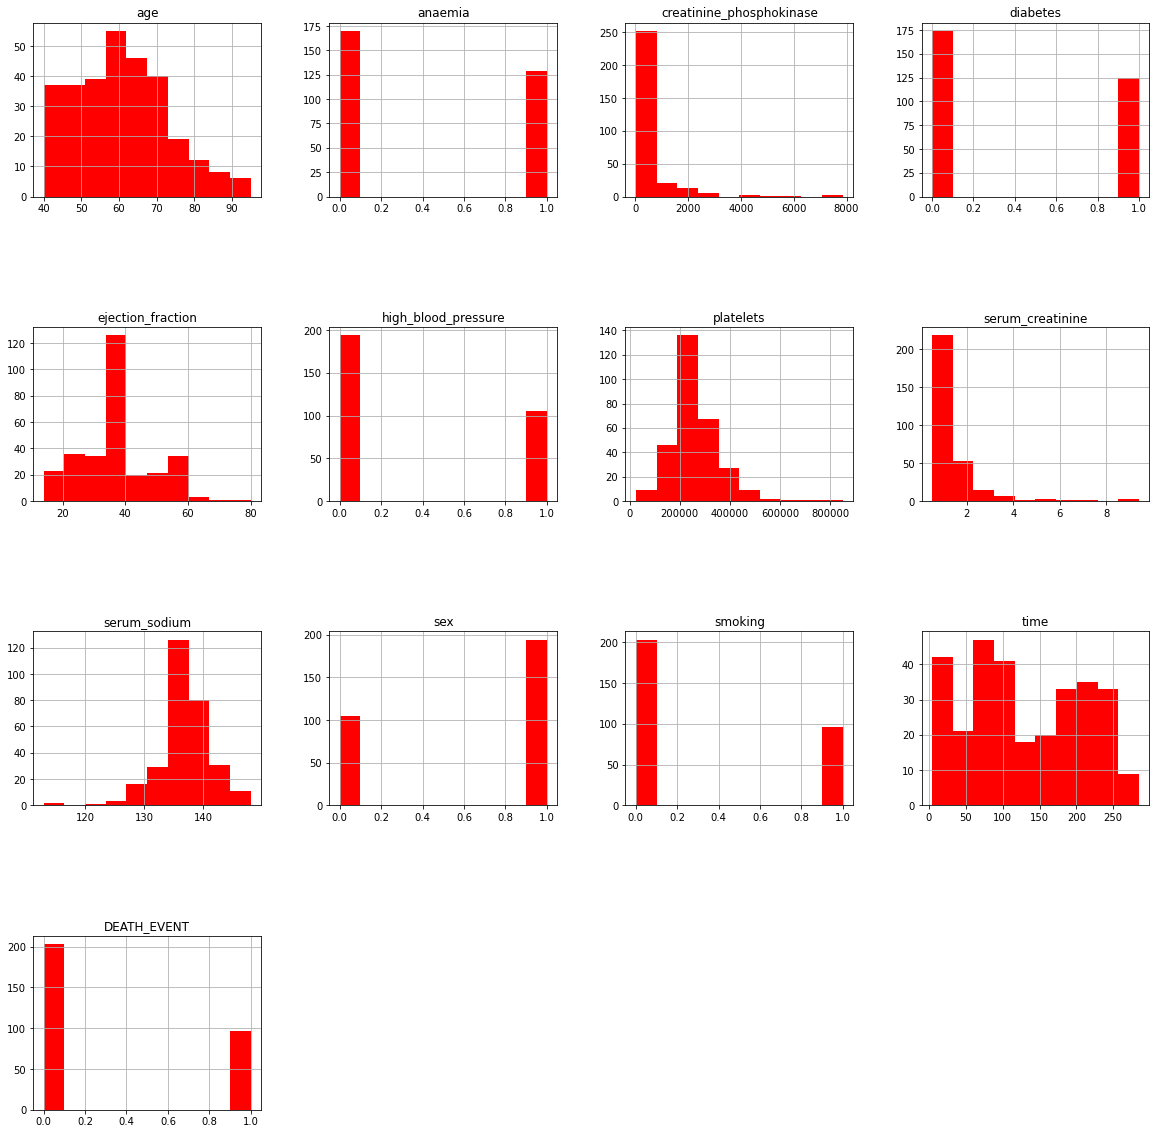

In [7]:
heart_data.hist(figsize=(20,20), color='r')
plt.subplots_adjust(hspace=.75);

#### Distribution of Death Event by Age

Of our 299 subjects 96 suffered a death event. We show the distribution of the subjects ages at death.

In [8]:
heart_data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [9]:
death_age = pd.DataFrame(heart_data.loc[heart_data['DEATH_EVENT'] == 1, 'age'])

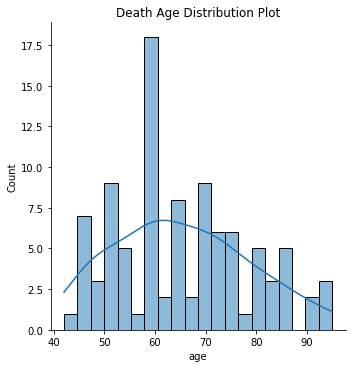

In [10]:

sns.displot(death_age['age'], bins=20, kde=True)
plt.title("Death Age Distribution Plot");

### Distribution of gender wise age  
  
You can see that the majority of the ages fall between 40 and 80.  
The largest distribution of males is just about 60, while the largest distribution of females is a bit higher.

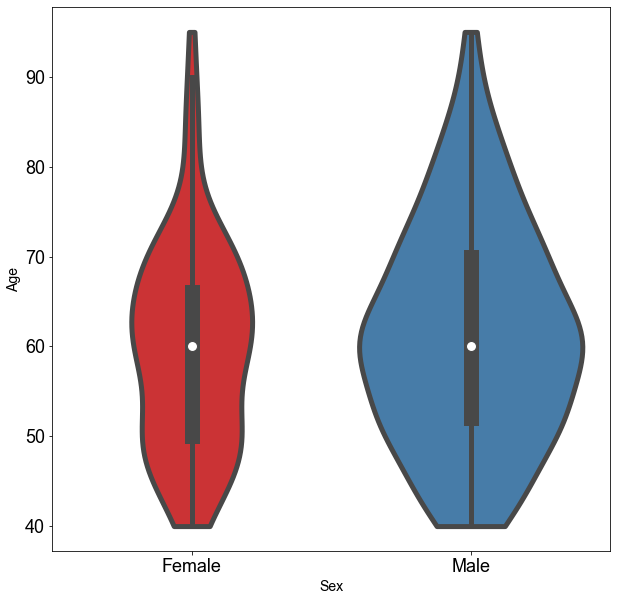

In [11]:
yticks = [40,50,60,70,80,90]
ylabels = ['40', '50', '60', '70', '80', '90']

plt.figure(figsize=(10,10))
g = sns.violinplot(x='sex', y='age', data=heart_data, cut = 0, linewidth=5, palette='Set1', scale='count')
sns.set_style('whitegrid')
g.set_ylabel('Age', fontsize=14)
g.set_xlabel('Sex', fontsize=14)
g.set_xticklabels(['Female', 'Male'], fontsize=18);
plt.yticks(yticks,ylabels,fontsize=18);


### Looking at the variables with Pandas Profiling

In [12]:
# profile = ProfileReport(heart_data, title="Pandas Profiling Report")
# profile.to_widgets()


### Investigating correlation  
We're going to use the Seaborn Pairplot function to see if there are any strongly correlated variables.  
  
__As an example__

The graph below, taken from a study on college admissions shows a very strong correlation between GPA and the chance of admission.

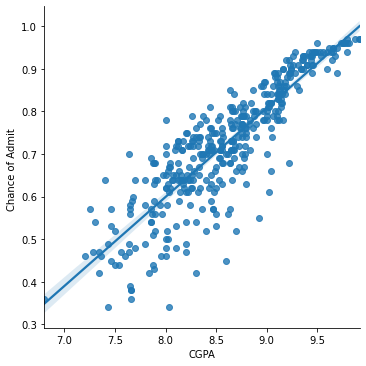

Looking at the charts below we don't see a strong correlation between any of the variables.  

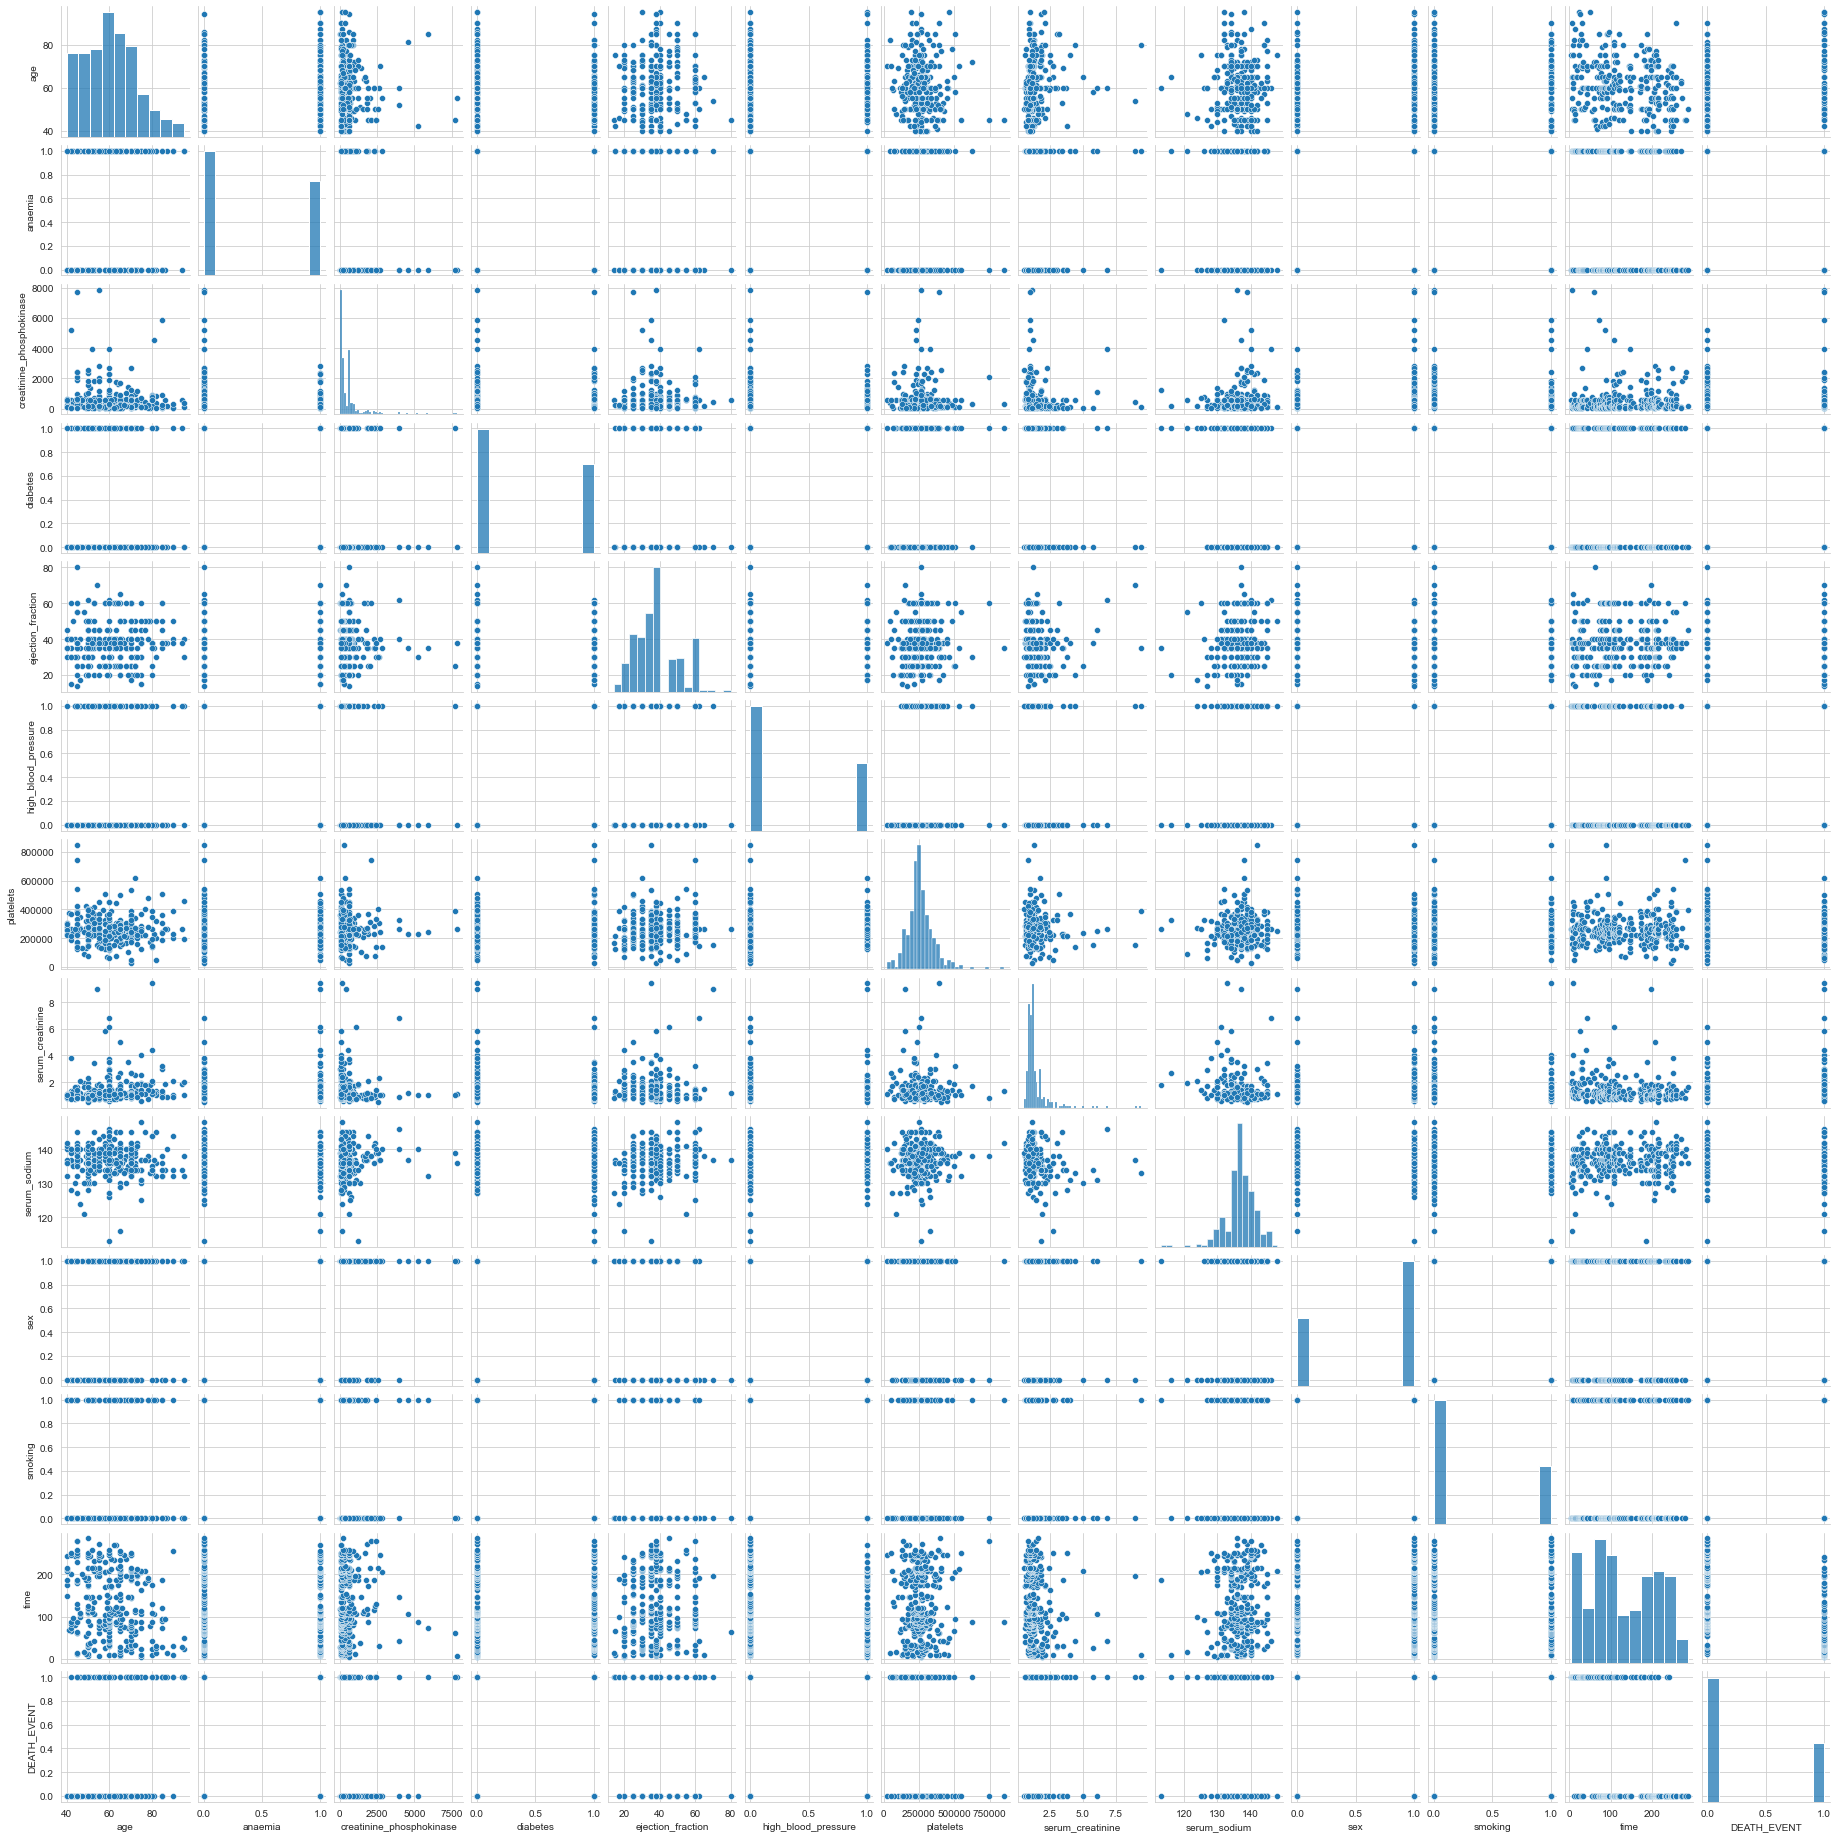

In [13]:
cols = heart_data.columns.tolist()
sns.pairplot(heart_data[cols], height=2.0)

### Exploration of Covariance  

Our covariance matrix below reports a number from -1, meaning strong negative correlation, to 1, strong correlation, with 0 meaning no correlation.  

Looking at the Death Event row, we see the strongest correlation between Time and Death Event. We see notable correlation (above 0.05) between Death Event and: Serum Creatinine, Ejection Fraction, Serum Sodium, High Blood Pressure, and Creatine Phosphokinase. Age also seems to be a factor, but it's hard to tell if it contributes to heart disease or if it's just natural causes.


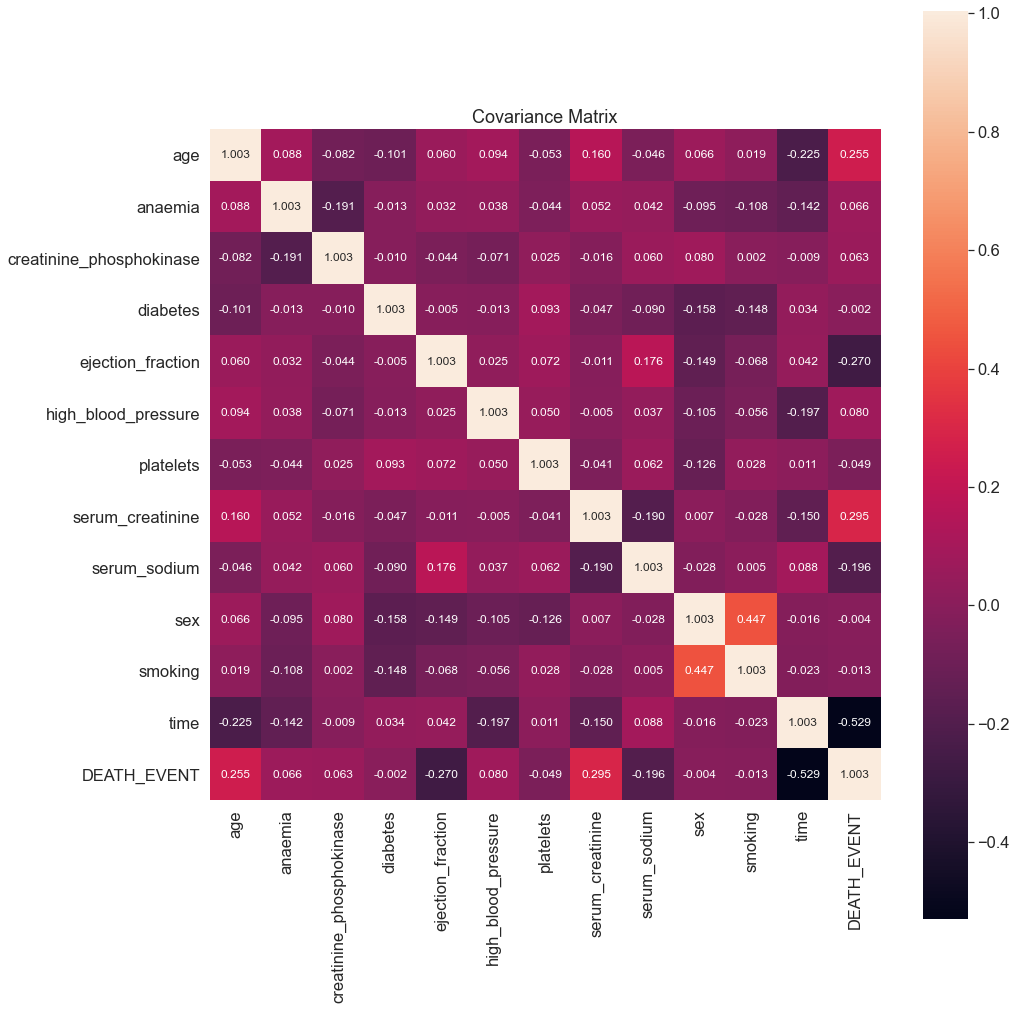

In [14]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_std = stdsc.fit_transform(heart_data[cols].iloc[:, range(0,13)].values)
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size':12}, yticklabels=cols, xticklabels=cols)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

# Investigating Variable Distributions

### Distribution of Death Event by gender and age.  
Looking at the plot we see that the mean age of death for women is 60, while the mean age of death for men is 65. It seems that women tend to live longer overall.

<AxesSubplot:xlabel='sex', ylabel='age'>

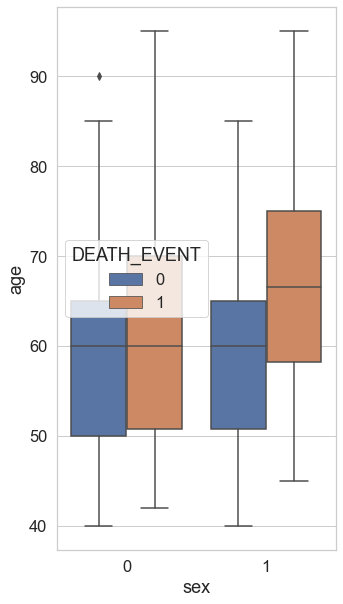

In [15]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
sns.boxplot(x='sex', y='age', hue='DEATH_EVENT', data=heart_data)

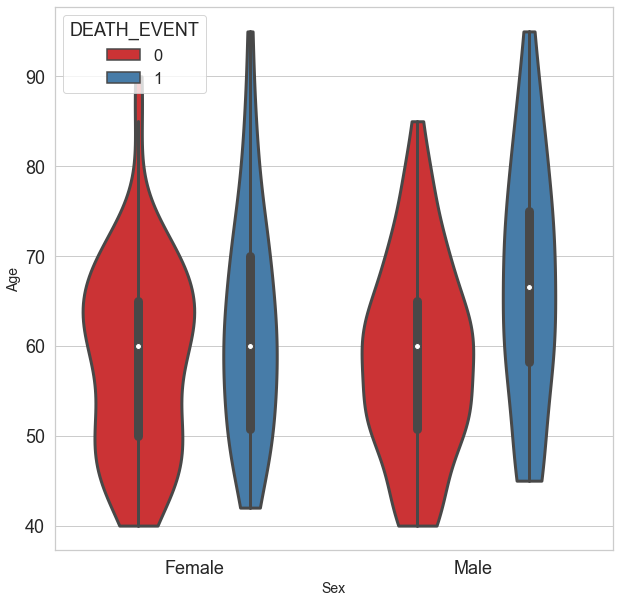

In [16]:
yticks = [40,50,60,70,80,90]
ylabels = ['40', '50', '60', '70', '80', '90']

plt.figure(figsize=(10,10))
g = sns.violinplot(x='sex', y='age', hue='DEATH_EVENT', data=heart_data, cut = 0, linewidth=3, palette='Set1', scale='count')
sns.set_style('whitegrid')
g.set_ylabel('Age', fontsize=14)
g.set_xlabel('Sex', fontsize=14)
g.set_xticklabels(['Female', 'Male'], fontsize=18);
plt.yticks(yticks,ylabels,fontsize=18);

### Distribution of diabetes and death event by age
People who have diabetes tend to die at a younger age.

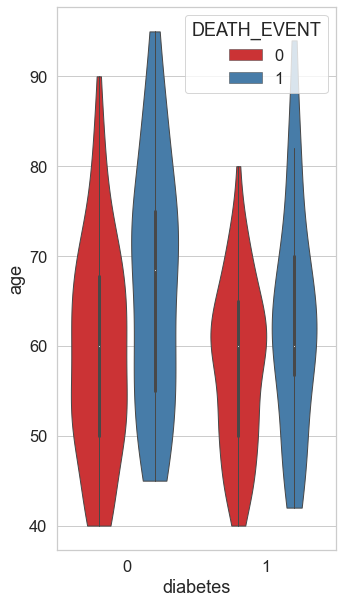

In [17]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
sns.violinplot(x='diabetes', y='age', hue='DEATH_EVENT', data=heart_data, 
               cut=0, palette='Set1', linewidth=1);

### Distribution of smoking and death event by age

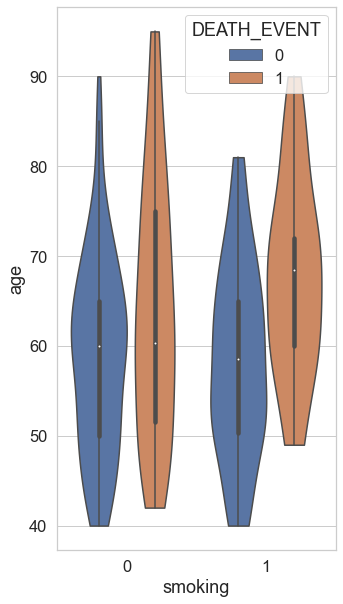

In [18]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
sns.violinplot(x='smoking', y='age', hue='DEATH_EVENT', data=heart_data, cut=0);

### Distribution of serum creatinine and death by gender

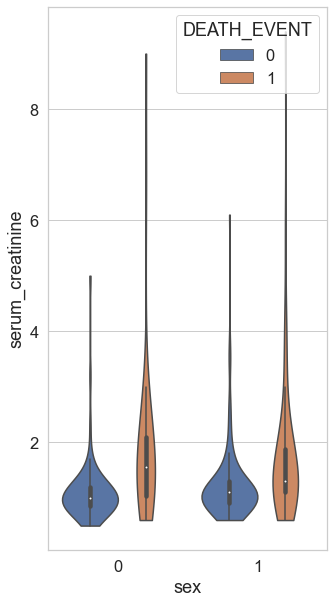

In [19]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
sns.violinplot(x='sex', y='serum_creatinine', hue='DEATH_EVENT', data=heart_data, cut=0);

### Distribution of high blood pressure by death and age

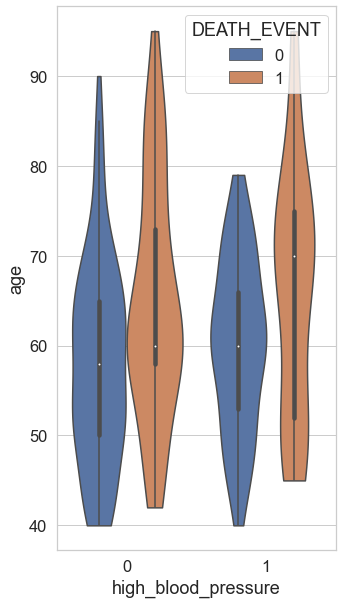

In [20]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
sns.violinplot(x='high_blood_pressure', y='age', hue='DEATH_EVENT', data=heart_data, cut=0);

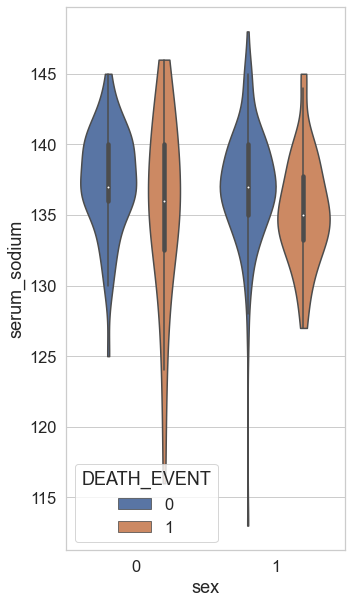

In [21]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
sns.violinplot(x='sex', y='serum_sodium', hue='DEATH_EVENT', data=heart_data, cut=0);

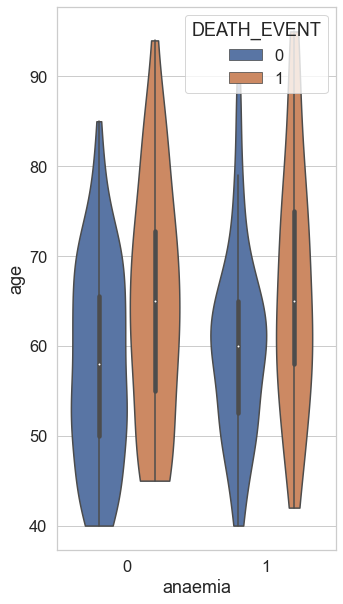

In [22]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
sns.violinplot(x='anaemia', y='age', hue='DEATH_EVENT', data=heart_data, cut=0);

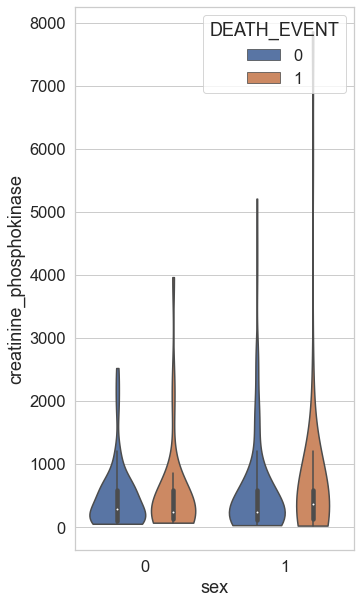

In [23]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
sns.violinplot(x='sex', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=heart_data, cut=0);

## What is “ejection fraction”?
Ejection fraction (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat.  

### What’s normal?
A normal heart’s ejection fraction may be between 50 and 70 percent.  
You can have a normal ejection fraction measurement and still have heart failure  
(called HFpEF or heart failure with preserved ejection fraction).  
  
If the heart muscle has become so thick and stiff that the ventricle holds a smaller than usual volume of blood, it might still seem to pump out a normal percentage of the blood that enters it. In reality, though, the total amount of blood pumped isn’t enough to meet your body’s needs.

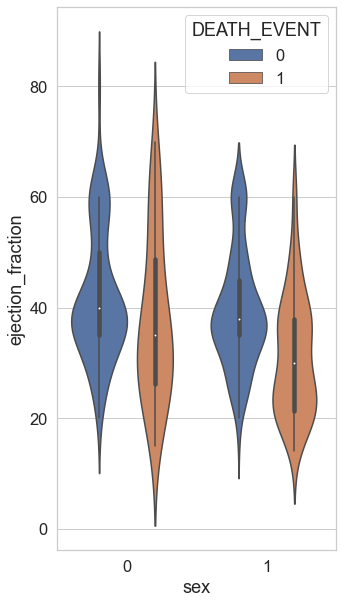

In [24]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
sns.violinplot(x='sex', y='ejection_fraction', hue='DEATH_EVENT', data=heart_data);

### Correlation between serum sodium levels and ejection fraction  
Because ejection fraction is so important we decided to test the correlation between serum sodium levels and ejection fraction.    
A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L). Hyponatremia occurs when the sodium in your blood falls below 135 mEq/L.

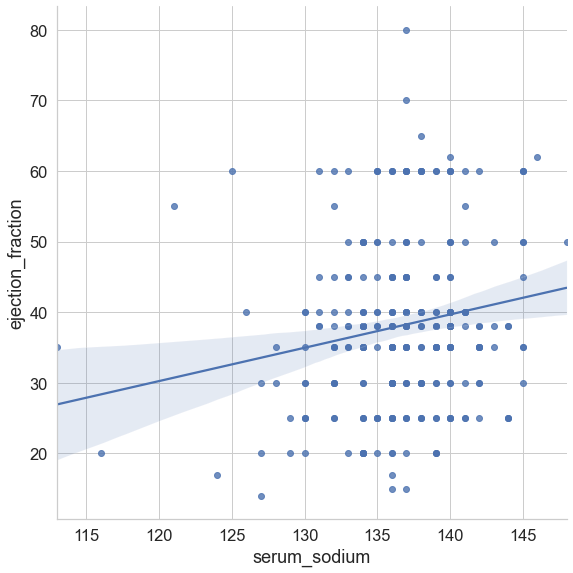

In [25]:
sns.lmplot(data=heart_data, x='serum_sodium', y='ejection_fraction', height=8, aspect=1);

#### Correlation  
The correlation between serum sodium levels is clear, low serum sodium levels correlates with a low ejection fraction.  
The question is one of causation. Does low serum sodium __cause__ a low ejection fraction or is it vice versa?

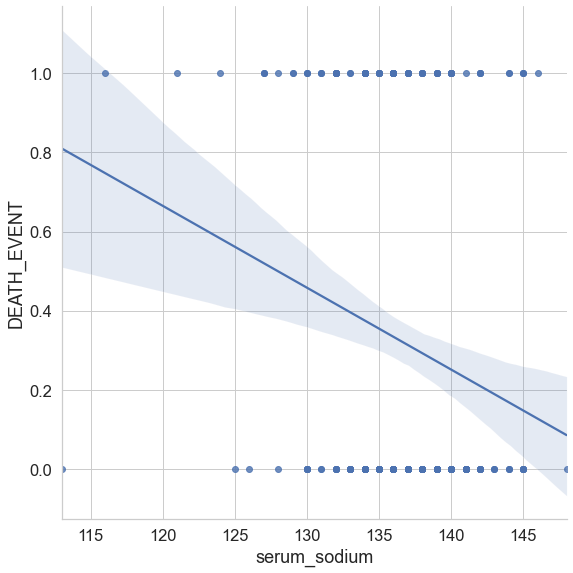

In [26]:
sns.lmplot(x='serum_sodium', y='DEATH_EVENT', data=heart_data, height=8, aspect=1);

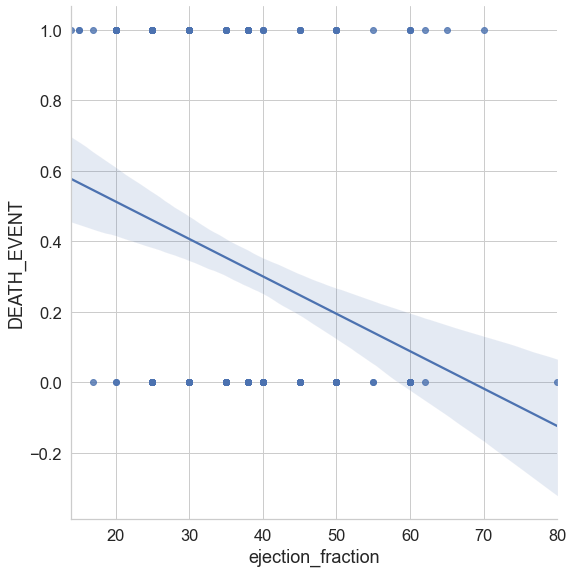

In [27]:
sns.lmplot(x='ejection_fraction', y='DEATH_EVENT', data=heart_data, height=8, aspect=1);

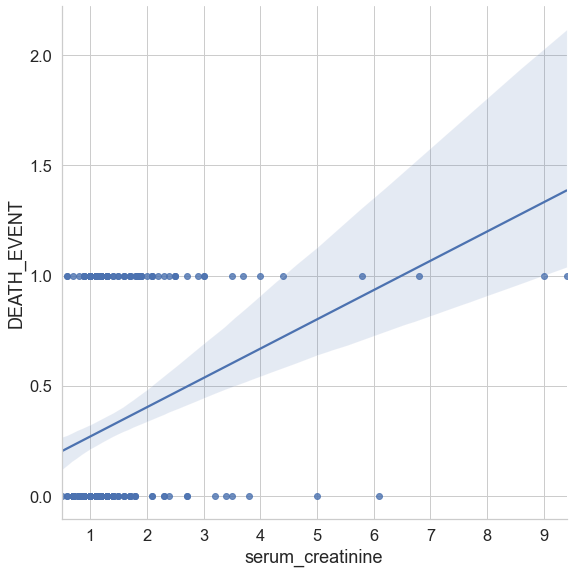

In [28]:
sns.lmplot(x='serum_creatinine', y='DEATH_EVENT', data=heart_data, height=8, aspect=1);

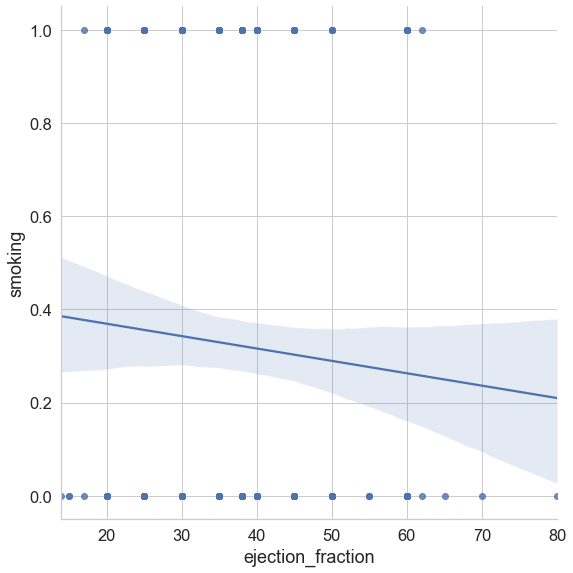

In [29]:
sns.lmplot(x='ejection_fraction', y='smoking', data=heart_data, height=8, aspect=1);

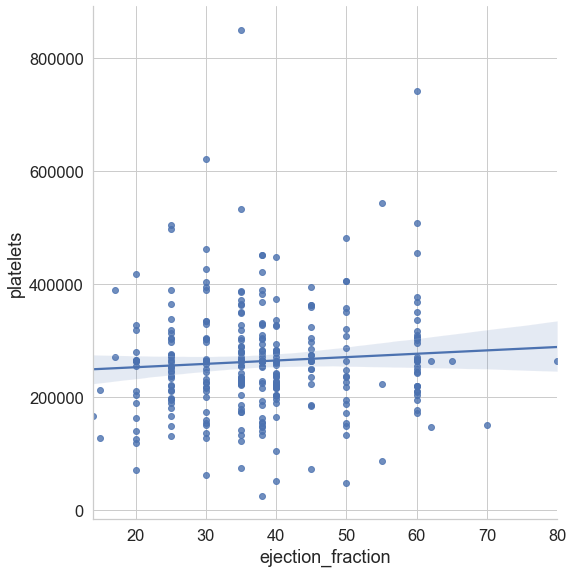

In [30]:
sns.lmplot(x='ejection_fraction', y='platelets', data=heart_data, height=8, aspect=1);

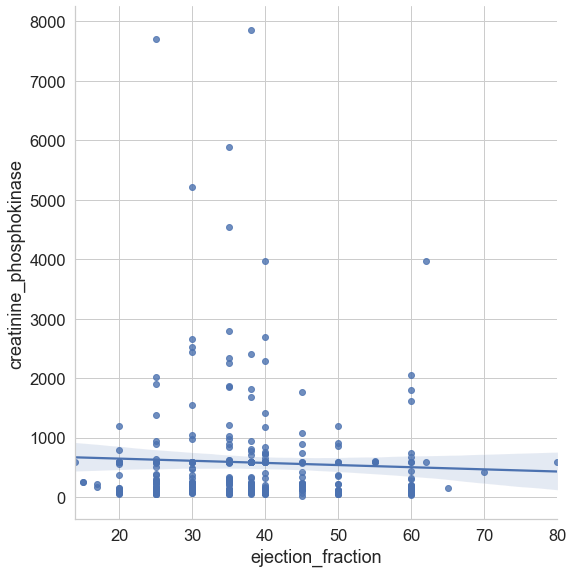

In [31]:
sns.lmplot(x='ejection_fraction', y='creatinine_phosphokinase', data=heart_data, height=8, aspect=1);

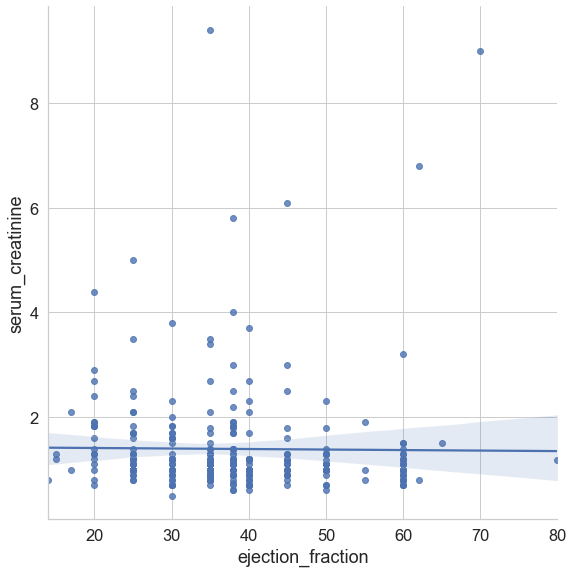

In [32]:
sns.lmplot(x='ejection_fraction', y='serum_creatinine', data=heart_data, height=8, aspect=1);

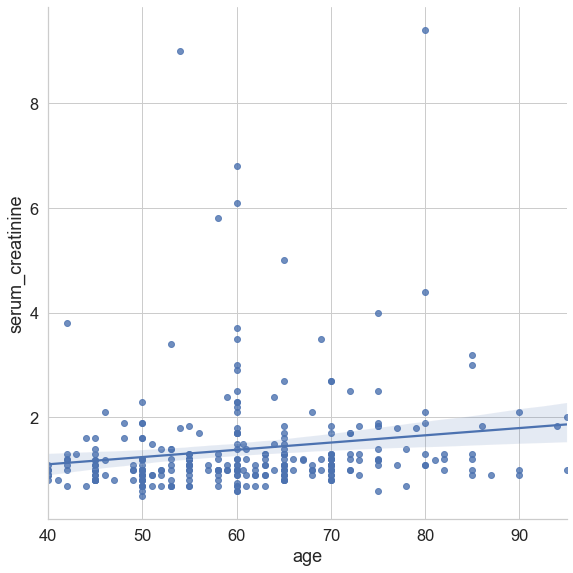

In [33]:
sns.lmplot(x='age', y='serum_creatinine', data=heart_data, height=8, aspect=1);

## Making a linear regression model between all variables and death  
Predicting Death based on Ejection Fraction

In [34]:
heart_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [35]:
# Subsetting our data
X_data = heart_data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking']]
y_data = heart_data[['DEATH_EVENT']]

# Splitting the data
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.33)

In [36]:
# Check the shape of our data sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 11) (200, 1)
(99, 11) (99, 1)


In [37]:
from sklearn import linear_model, preprocessing 

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [38]:
# Evaluate the model by looking at the R-Squared coefficient
rModel.score(X_train, y_train)

0.2716360493650263

#### Our R-Squared score if very low, which is not good.

In [39]:
# Use the model to make predictions
y_pred = rModel.predict(X_test)

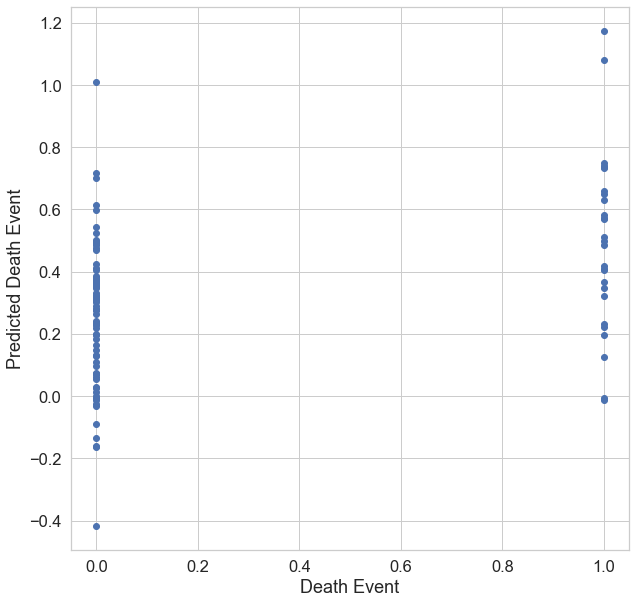

In [40]:
# Plot the predictions agains the actual data
plt.figure(figsize=(10,10))
plt.xlabel('Death Event')
plt.ylabel('Predicted Death Event')
plt.scatter(y_test, y_pred)

## Making a linear regression model between Serum Sodium and Ejection Fraction
Predicting Ejection Fraction based on Serum Sodium

In [41]:
# Subsetting our data- we are going to try to use serum sodium to predict ejection fraction
X_data = heart_data[['serum_sodium']]
y_data = heart_data[['ejection_fraction']]

# Splitting the data
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.33)

In [42]:
# Check the shape of our data sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 1) (200, 1)
(99, 1) (99, 1)


In [43]:
from sklearn import linear_model, preprocessing 

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [44]:
# Evaluate the model by looking at the R-Squared coefficient
rModel.score(X_train, y_train)

0.031268280738512955

In [45]:
# Use the model to make predictions
y_pred = rModel.predict(X_test)

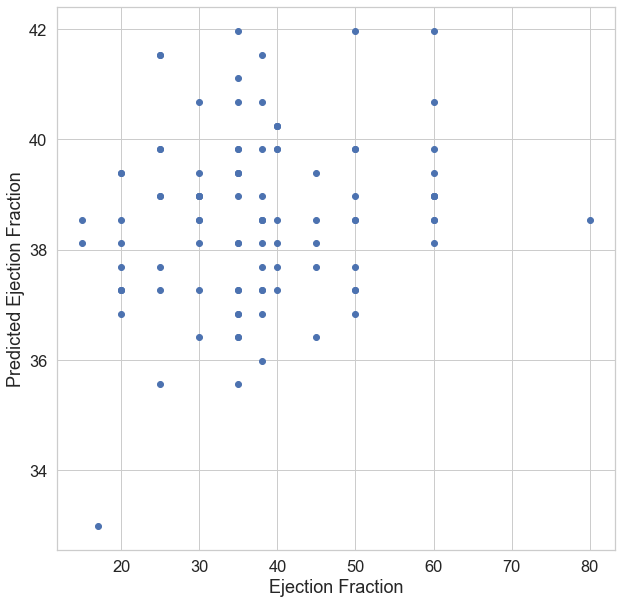

In [46]:
# Plot the predictions agains the actual data
plt.figure(figsize=(10,10))
plt.xlabel('Ejection Fraction')
plt.ylabel('Predicted Ejection Fraction')
plt.scatter(y_test, y_pred)

## Multiple Linear Regression
We're going to make another model using all non-boolean variables.

In [47]:
heart_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [48]:
# Create test and train data sets
X_data = heart_data.drop(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'time', 'DEATH_EVENT'], axis=1)
y_data = heart_data[['ejection_fraction']]

# Splitting the data
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.33)

In [49]:
# Check shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(200, 6) (99, 6)
(200, 1) (99, 1)


In [50]:
rModel_2 = linear_model.LinearRegression(normalize=True)
rModel_2.fit(X_train, y_train)

LinearRegression(normalize=True)

In [51]:
# Evaluate the model
rModel_2.score(X_train, y_train)

1.0

#### R-Squared
An R-Squared score of 1 indicates a perfect model. Is that even possible?

I realized that I forgot to drop Ejection Fraction from the data set.

In [52]:
# Create test and train data sets
X_data = heart_data.drop(['anaemia', 'diabetes', 'ejection_fraction','high_blood_pressure', 'sex', 
                          'smoking', 'time', 'DEATH_EVENT'], axis=1)
y_data = heart_data[['ejection_fraction']]

# Splitting the data
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.33)

In [53]:
# Check shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(200, 5) (99, 5)
(200, 1) (99, 1)


In [54]:
rModel_2 = linear_model.LinearRegression(normalize=True)
rModel_2.fit(X_train, y_train)

LinearRegression(normalize=True)

In [55]:
# Evaluate the model
rModel_2.score(X_train, y_train)

0.08761592500612236

In [56]:
#### This is an improvement over our previous model.

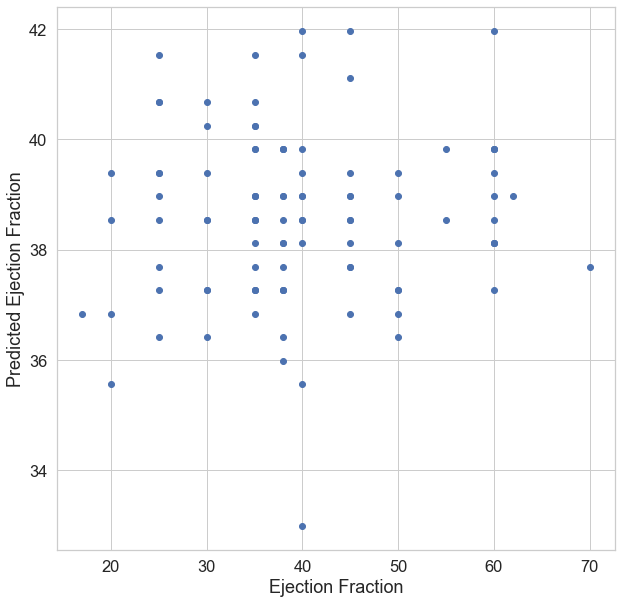

In [57]:
# Let's plot the predictions against the actual result.
plt.figure(figsize=(10, 10))
plt.xlabel('Ejection Fraction')
plt.ylabel('Predicted Ejection Fraction')
plt.scatter(y_test, y_pred);

## Ordinary Least Squares Model

In [58]:
# Create test and train data sets
X_data = heart_data.drop(['anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 
                          'sex', 'smoking', 'time', 'DEATH_EVENT'], axis=1)
y_data = heart_data[['ejection_fraction']]

# Splitting the data
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.33)

In [59]:
# Check shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(200, 5) (99, 5)
(200, 1) (99, 1)


In [60]:
import statsmodels.api as sm

# Create the model
rModel_3 = sm.OLS(y_train, X_train)

# Fit the model
rModel_3_fit = rModel_3.fit()

In [61]:
# Evaluate the model
rModel_3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      ejection_fraction   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              410.2
Date:                Wed, 23 Dec 2020   Prob (F-statistic):                   2.13e-101
Time:                        14:49:33   Log-Likelihood:                         -768.93
No. Observations:                 200   AIC:                                      1548.
Df Residuals:                     195   BIC:                                      1564.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                         -0.0285      0.068     -0.418      0.677      -0.163       0.106
creatinine_phosphokinase    -0.0007      0.001     -0.898      0.370      -0.002       0.001
platelets                 6.931e-06   8.66e-06      0.800      0.424   -1.01e-05     2.4e-05
serum_creatinine             0.5850      0.734      0.797      0.426      -0.862       2.032
serum_sodium                 0.2644      0.036      7.365      0.000       0.194       0.335
==============================================================================
Omnibus:                       11.707   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.648
Skew:                           0.616   Prob(JB):                      0.00179
Kurtosis:                       2.957   Cond. No.                     2.56e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# Use our new model to make predictions
y_pred = rModel_3_fit.predict(X_test)

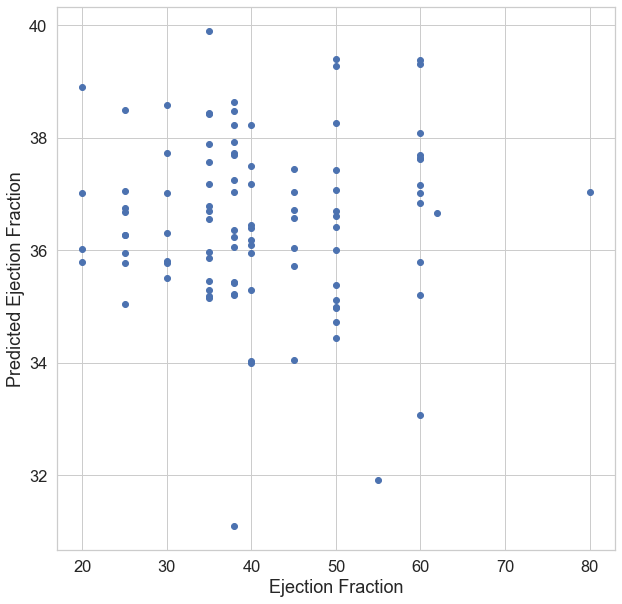

In [63]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(10, 10))
plt.xlabel('Ejection Fraction')
plt.ylabel('Predicted Ejection Fraction')
plt.scatter(y_test, y_pred);

In [64]:
pred_act = pd.DataFrame(y_test)
pred_act['predicted ejection fraction'] = y_pred
pred_act.sample(20)

,ejection_fraction,predicted ejection fraction
244,38,36.351155
265,35,38.412431
243,40,36.387800
81,50,36.406768
238,40,35.948982
87,60,37.692687
125,50,36.613446
157,25,36.755193
19,55,31.916223
181,25,36.268627


<AxesSubplot:xlabel='ejection_fraction', ylabel='predicted ejection fraction'>

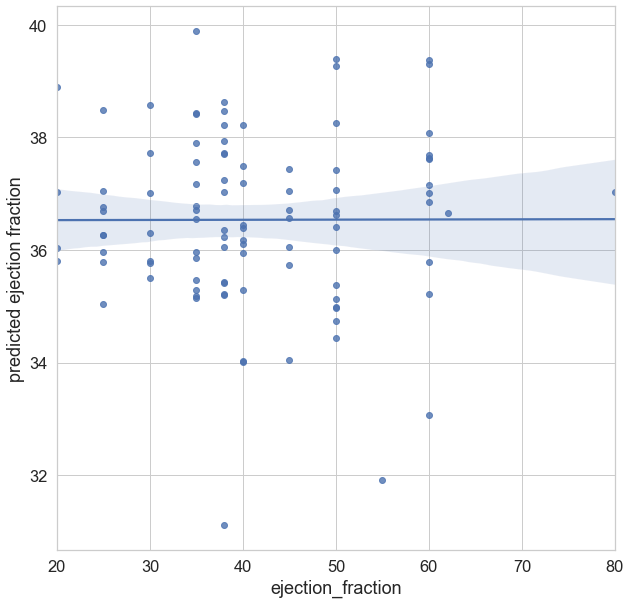

In [65]:
plt.figure(figsize=(10,10))
sns.regplot(x='ejection_fraction', y='predicted ejection fraction', data=pred_act)

### OLS with 3 main variables

In [66]:
heart_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [67]:
# Create test and train data sets
X_data = heart_data[['age', 'platelets', 'serum_sodium']]
y_data = heart_data[['ejection_fraction']]

# Splitting the data
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.33)
X_data.head()

,age,platelets,serum_sodium
0,75.0,265000.00,130
1,55.0,263358.03,136
2,65.0,162000.00,129
3,50.0,210000.00,137
4,65.0,327000.00,116


In [68]:
# Create the model
rModel_4 = sm.OLS(y_train, X_train)

# Fit the model
rModel_4_fit = rModel_4.fit()

In [69]:
rModel_4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      ejection_fraction   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              670.7
Date:                Wed, 23 Dec 2020   Prob (F-statistic):                   4.27e-103
Time:                        14:49:34   Log-Likelihood:                         -777.32
No. Observations:                 200   AIC:                                      1561.
Df Residuals:                     197   BIC:                                      1571.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
age              0.0645      0.069      0.931      0.353      -0.072       0.201
platelets     1.031e-05   8.48e-06      1.216      0.225   -6.41e-06     2.7e-05
serum_sodium     0.2275      0.035      6.426      0.000       0.158       0.297
==============================================================================
Omnibus:                       10.328   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.081
Skew:                           0.566   Prob(JB):                      0.00392
Kurtosis:                       2.785   Cond. No.                     2.55e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
pred_act = pd.DataFrame(y_test)
pred_act['predicted ejection fraction'] = y_pred
pred_act.sample(20)

,ejection_fraction,predicted ejection fraction
295,38,NaN
72,35,NaN
175,60,37.632318
251,35,37.896137
191,60,36.847564
94,38,38.466377
50,25,NaN
259,50,36.690603
95,60,NaN
297,38,NaN


<AxesSubplot:xlabel='ejection_fraction', ylabel='predicted ejection fraction'>

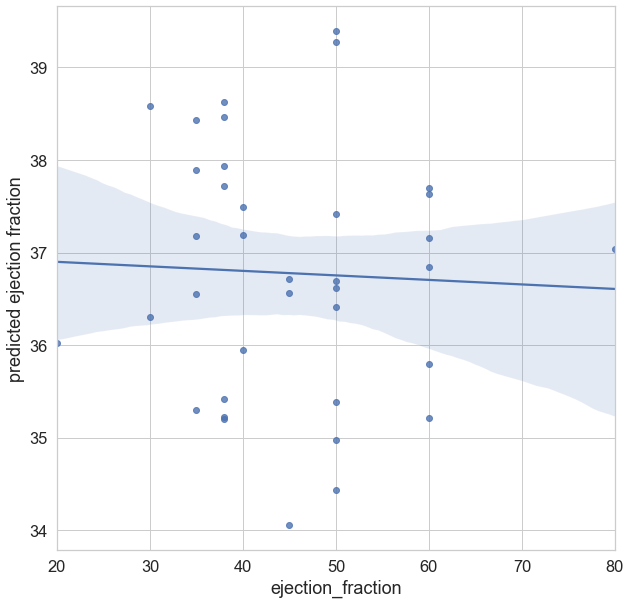

In [71]:
plt.figure(figsize=(10,10))
sns.regplot(x='ejection_fraction', y='predicted ejection fraction', data=pred_act)

## Random Forest Classifier

In [72]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [73]:
# Separate X and y
X = heart_data.drop(['time', 'DEATH_EVENT'], axis='columns')
y = heart_data['DEATH_EVENT']

# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [74]:
y_train

204    0
213    1
102    0
78     0
263    0
      ..
248    0
212    0
48     1
163    1
52     1
Name: DEATH_EVENT, Length: 200, dtype: int64

In [75]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [76]:
pred_y = clf.predict(X_test)

In [77]:
pred_y

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [78]:
y_test

150    1
71     0
1      1
234    0
91     0
      ..
193    0
158    0
223    0
293    0
286    0
Name: DEATH_EVENT, Length: 99, dtype: int64

In [79]:
RFpred_act = pd.DataFrame(pred_y, columns=['Predicted'])
RFpred_act['Actual'] = y_test

In [80]:
RFpred_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Predicted  99 non-null     int64  
 1   Actual     31 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [81]:
df = RFpred_act.dropna(axis='index')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 98
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Predicted  31 non-null     int64  
 1   Actual     31 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 744.0 bytes


In [82]:
df = df.astype('int64')

In [83]:
correct = df['Predicted'] + df['Actual']
df['Correct'] = correct

In [84]:
df.head()

,Predicted,Actual,Correct
0,1,1,2
1,0,1,1
2,0,1,1
11,0,1,1
12,1,1,2


In [85]:
df['Actual'].value_counts()

1    20
0    11
Name: Actual, dtype: int64

In [86]:
df['Correct'].value_counts()

1    13
2     9
0     9
Name: Correct, dtype: int64

In [87]:
clf.score(X_test, y_test)

0.7171717171717171

### Test with less features

Death Event and: Serum Creatinine, Ejection Fraction, Serum Sodium, High Blood Pressure, and Creatine Phosphokinase. Age also seems to be a factor

In [88]:
heart_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [89]:
X = heart_data[['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'age']]
y = heart_data['DEATH_EVENT']

# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [90]:
X_train.shape

(200, 4)

In [91]:
y_train.shape

(200,)

In [92]:
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)

RFpred_act = pd.DataFrame(pred_y, columns=['Predicted'])
RFpred_act['Actual'] = y_test

In [93]:
RFpred_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Predicted  99 non-null     int64  
 1   Actual     34 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [94]:
RFpred_act.head()

,Predicted,Actual
0,0,1.0
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


In [95]:
df = RFpred_act.dropna(axis='index')
df = df.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 96
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Predicted  34 non-null     int64
 1   Actual     34 non-null     int64
dtypes: int64(2)
memory usage: 816.0 bytes


In [96]:
df.head()

,Predicted,Actual
0,0,1
6,0,1
7,0,1
9,1,1
12,0,1


In [97]:
correct = df['Predicted'] + df['Actual']
df['Correct'] = correct
df

,Predicted,Actual,Correct
0,0,1,1
6,0,1,1
7,0,1,1
9,1,1,2
12,0,1,1
17,1,1,2
21,0,1,1
26,0,1,1
27,0,1,1
29,0,1,1


In [98]:
clf.score(X_test, y_test)

0.7171717171717171